In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

df = pd.read_csv('../input/world-airports/World_Airports.csv')
df['runway_surface'] = df['runway_surface'].apply(func=lambda x: x if isinstance(x, float) else str(x).upper())
df['runway_lighted'] = df['runway_lighted'] == 1.0
df['runway_closed'] = df['runway_closed'] == 1.0
df.head()

,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4.212194e+06,1,6528,00CA,small_airport,Goldstone (GTS) Airport,35.354740,-116.885329,3038.0,...,NaN,NaN,NaN,CTAF,122.9,6000.0,80.0,ASPH,False,False
1,-9.034601e+06,3.347916e+06,2,6589,01FL,small_airport,Cedar Knoll Flying Ranch Airport,28.781900,-81.159203,19.0,...,NaN,NaN,NaN,NaN,122.9,3000.0,50.0,TURF,True,False
2,-1.309952e+07,4.104774e+06,3,6756,04CA,small_airport,Gray Butte Field,34.563900,-117.675003,3020.0,...,NaN,NaN,NaN,CTAF,122.9,5000.0,150.0,ASPH,False,False
3,-1.011189e+07,3.887414e+06,4,6779,04MS,small_airport,Nick's Flying Service Inc Airport,32.940537,-90.836683,100.0,...,NaN,NaN,NaN,UNICOM,122.8,3400.0,100.0,ASPH-TURF,False,False
4,-1.287577e+07,4.267031e+06,5,6784,04NV,small_airport,Kingston Ranch Airport,35.755501,-115.665001,2620.0,...,NaN,NaN,NaN,UNICOM,123.0,3240.0,45.0,ASPH,True,False


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

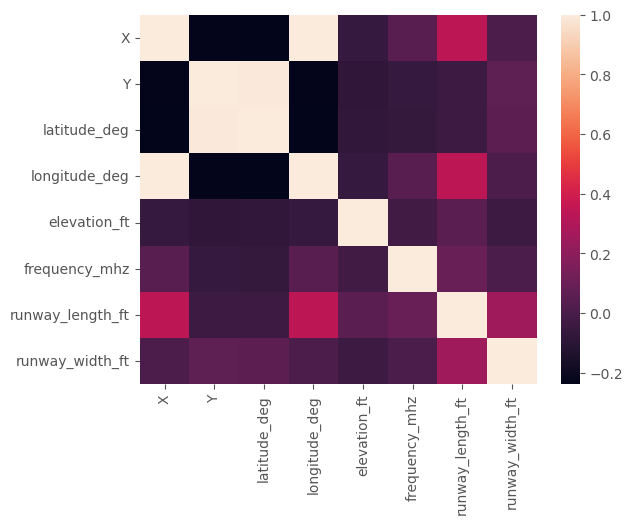

In [2]:
from seaborn import heatmap
heatmap(df[['X', 'Y', 'latitude_deg', 'longitude_deg', 'elevation_ft', 'frequency_mhz', 'runway_length_ft', 'runway_width_ft']].corr())

It looks like X ~ longitude and Y ~ latitude.

In [3]:
df[['X', 'Y', 'latitude_deg', 'longitude_deg', ]].corr()

,X,Y,latitude_deg,longitude_deg
X,1.000000,-0.229565,-0.238613,1.000000
Y,-0.229565,1.000000,0.994472,-0.229565
latitude_deg,-0.238613,0.994472,1.000000,-0.238601
longitude_deg,1.000000,-0.229565,-0.238601,1.000000


We kind of know that if we plot X vs Y we'll see a land map. Can we tell that by looking at X and Y as histograms?

<Axes: ylabel='Frequency'>

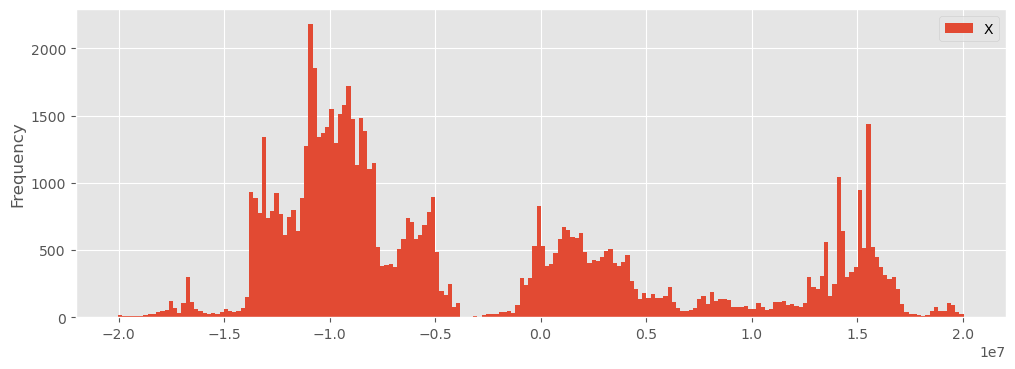

In [4]:
df['X'].plot.hist(bins=200, legend=True, figsize=(12, 4))

<Axes: ylabel='Frequency'>

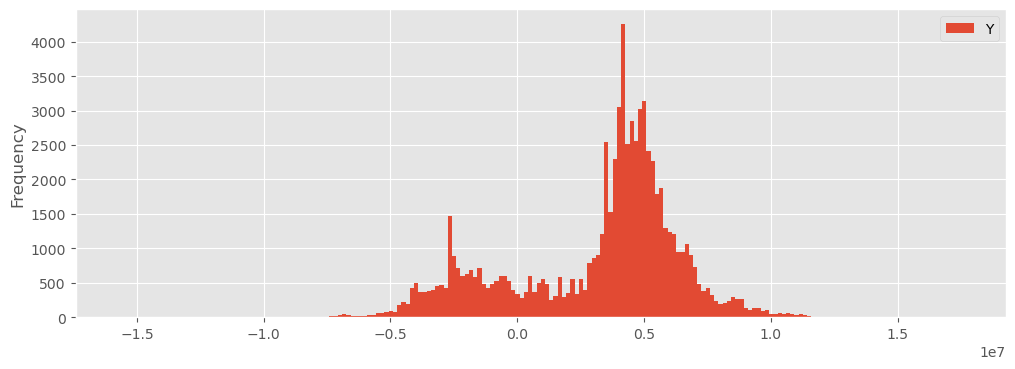

In [5]:
df['Y'].plot.hist(bins=200, legend=True, figsize=(12, 4))

<Axes: xlabel='X', ylabel='Y'>

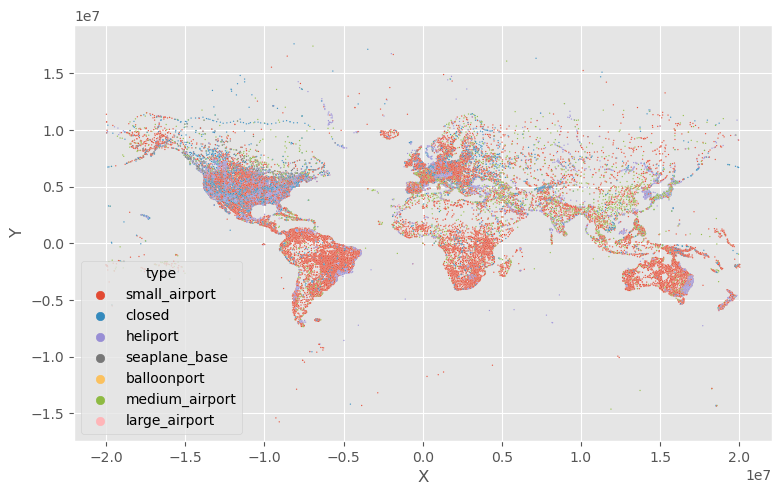

In [6]:
from seaborn import scatterplot
from matplotlib.pyplot import subplots
size = 9 # let's do a sloppy golden ratio size
fig, ax = subplots(figsize=(size, 0.6 * size))
scatterplot(data=df, x='X', y='Y', s=1, ax=ax, hue='type')

<Axes: xlabel='elevation_ft', ylabel='runway_length_ft'>

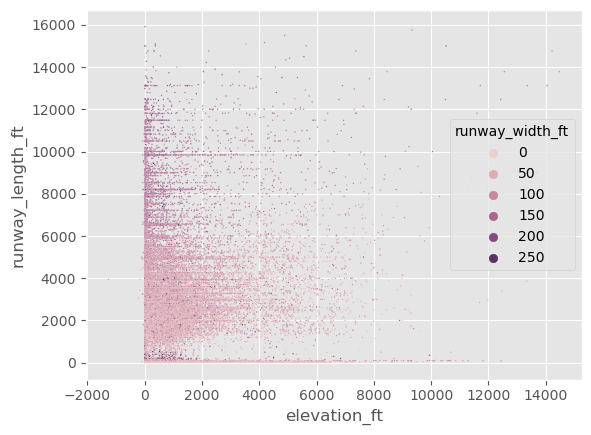

In [7]:
from seaborn import scatterplot
scatterplot(data=df[df['runway_width_ft'] < 300], s=1, x='elevation_ft', y='runway_length_ft', hue='runway_width_ft')

Clearly runways do not get longer as they get higher, and our runway width data is noisy.

In [8]:
df[['elevation_ft', 'runway_length_ft', 'runway_width_ft']].corr()

,elevation_ft,runway_length_ft,runway_width_ft
elevation_ft,1.000000,0.053271,-0.038805
runway_length_ft,0.053271,1.000000,0.252747
runway_width_ft,-0.038805,0.252747,1.000000


In [9]:
df[df['runway_width_ft'] < 300][['elevation_ft', 'runway_length_ft', 'runway_width_ft']].corr()

,elevation_ft,runway_length_ft,runway_width_ft
elevation_ft,1.000000,0.051789,-0.074848
runway_length_ft,0.051789,1.000000,0.557419
runway_width_ft,-0.074848,0.557419,1.000000


<Axes: ylabel='Frequency'>

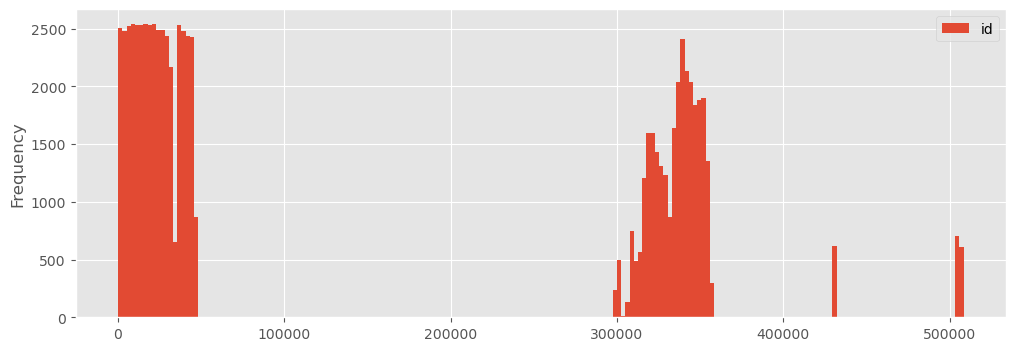

In [10]:
df['id'].plot.hist(bins=200, legend=True, figsize=(12, 4))

It looks like some other kind of information is coded into the ID. Can't imagine what that would be.

<Axes: ylabel='Frequency'>

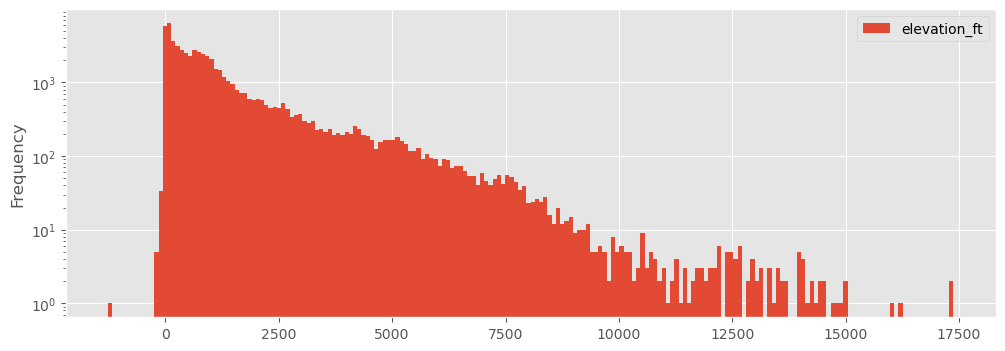

In [11]:
# these obviously cluster around zero, so let's use a log plot to get them to spread out
df['elevation_ft'].plot.hist(bins=200, legend=True, figsize=(12, 4), log=True)

<Axes: ylabel='Frequency'>

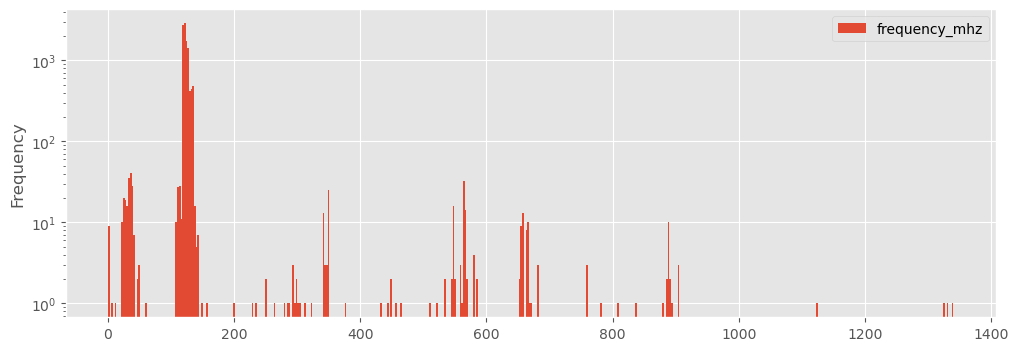

In [12]:
df['frequency_mhz'].plot.hist(bins=500, legend=True, figsize=(12, 4), log=True)

<Axes: xlabel='X', ylabel='Y'>

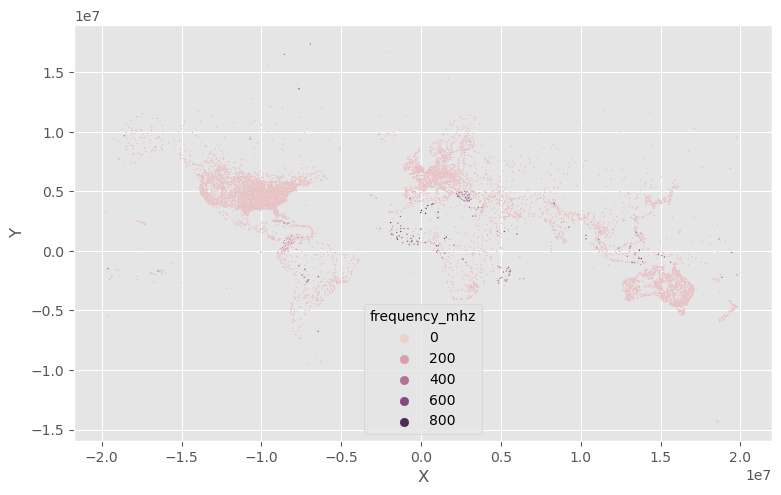

In [13]:
size = 9 # let's do a sloppy golden ratio size
fig, ax = subplots(figsize=(size, 0.6 * size))
# scatterplot(data=df, x='X', y='Y', s=1, ax=ax, hue='frequency_mhz')
scatterplot(data=df[df['frequency_mhz'] < 1000], x='X', y='Y', s=1, ax=ax, hue='frequency_mhz')

I think we know that lower-frequency radio signals don't propogate as far, so maybe we would expect lower frequencies for less remote airports.

<Axes: xlabel='X', ylabel='Y'>

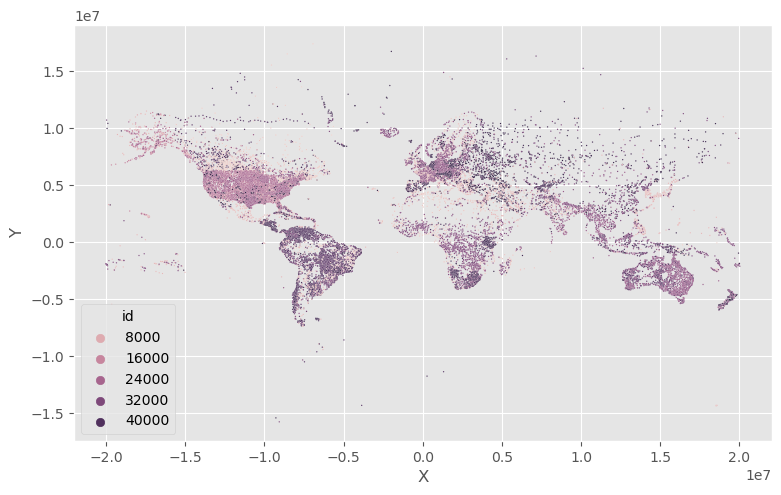

In [14]:
size = 9 # let's do a sloppy golden ratio size
fig, ax = subplots(figsize=(size, 0.6 * size))
scatterplot(data=df[df['id'] < 100000], x='X', y='Y', s=1, ax=ax, hue='id')

We're just looking at the lower ID number cluster here; it's almost as if id is a proxy for airport age. We don't have a variable that will tell us when an airport was registered so we can't say.

<Axes: xlabel='X', ylabel='Y'>

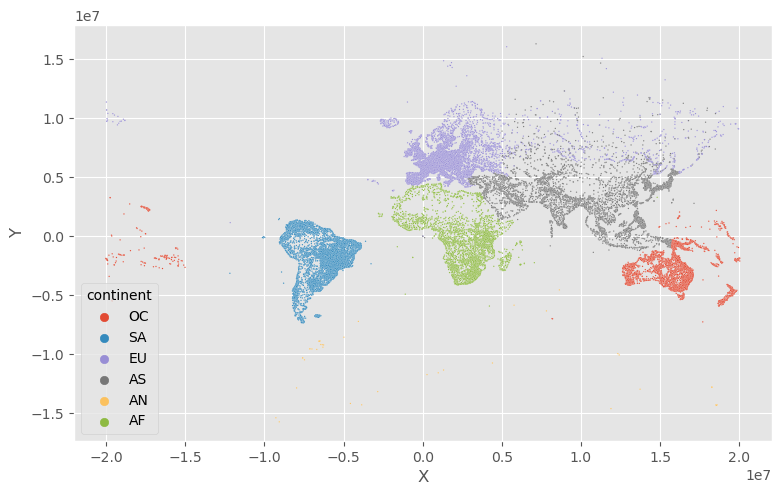

In [15]:
size = 9 # let's do a sloppy golden ratio size
fig, ax = subplots(figsize=(size, 0.6 * size))
scatterplot(data=df, x='X', y='Y', s=1, ax=ax, hue='continent')

Seems like something is missing from our continent column but I can't quite put my finger on what exactly it is.

<Axes: ylabel='Frequency'>

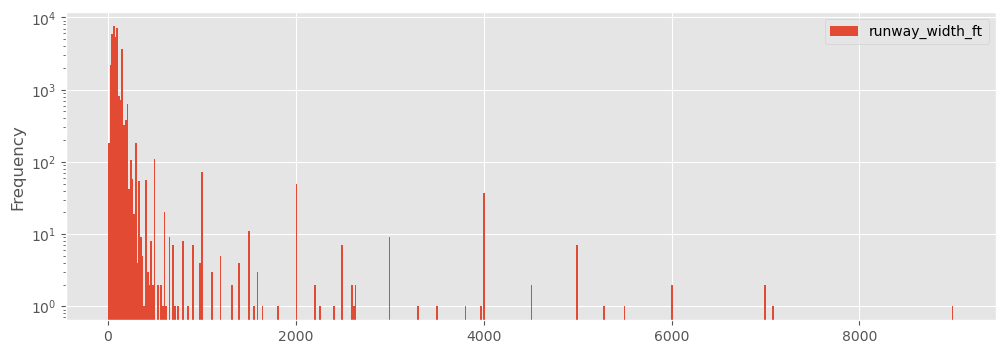

In [16]:
df['runway_width_ft'].plot.hist(bins=500, legend=True, figsize=(12, 4), log=True)

I find it difficult to believe there are runways more than 1000 ft wide.

Let's have a look at the roadway surface counts. We have a lot of kinds that are poorly represented, so we're going to just look at the top few.

<Axes: >

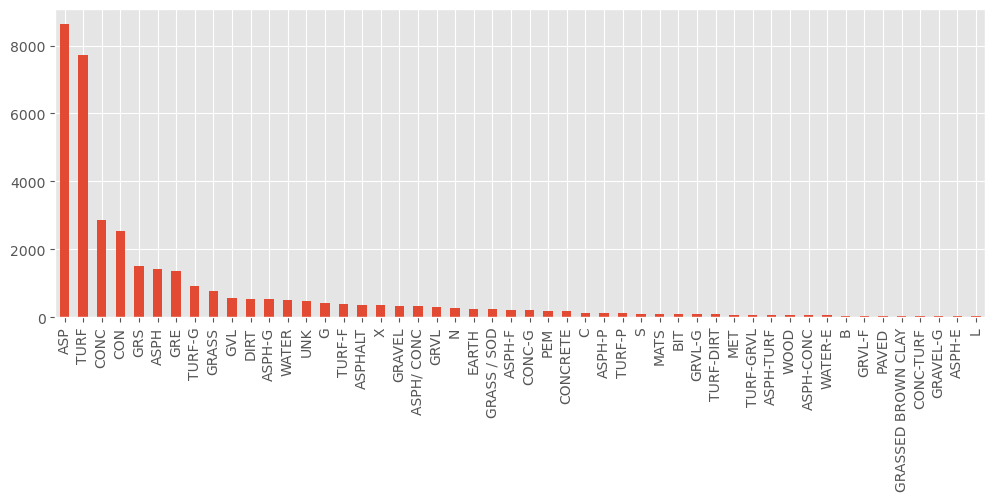

In [17]:
fig, ax = plt.subplots(figsize=(12, 4))
df['runway_surface'].value_counts().head(n=50).plot(kind='bar', ax=ax)

<Axes: ylabel='type'>

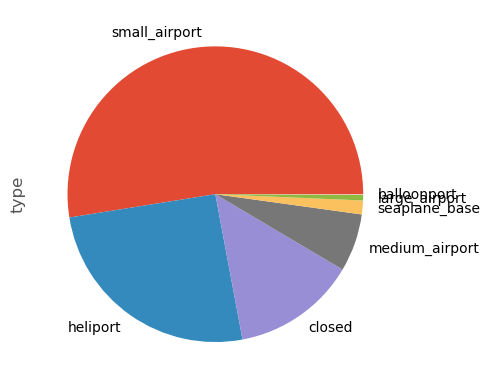

In [18]:
df['type'].value_counts().plot(kind='pie')

<Axes: >

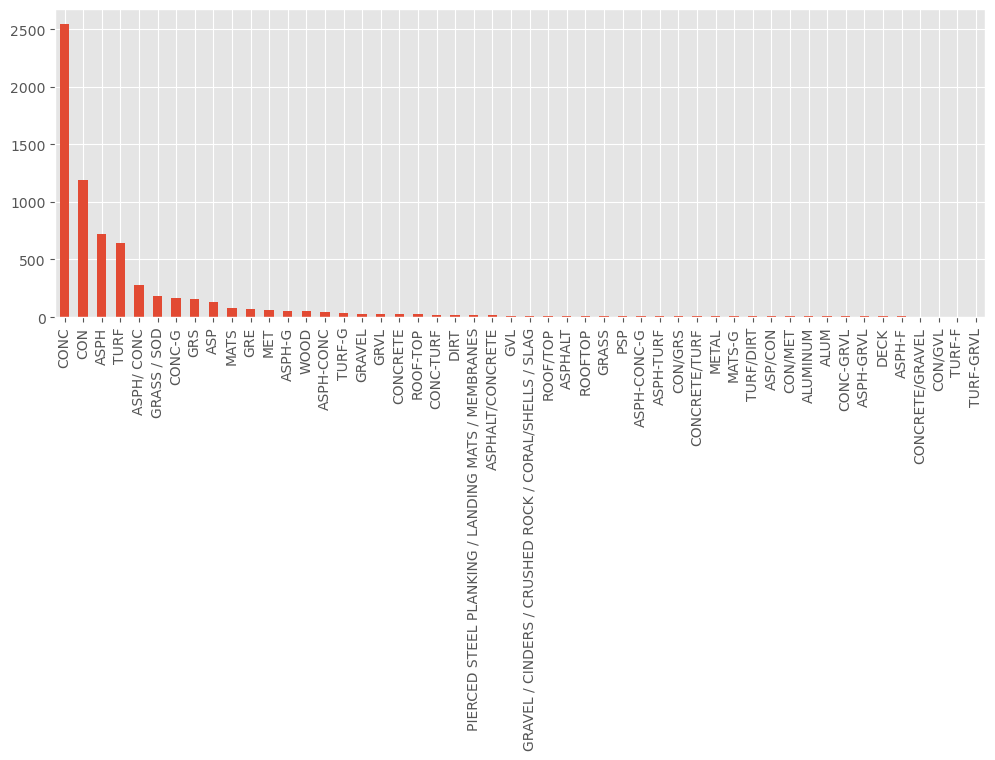

In [19]:
# heliports tend to be concrete
fig, ax = plt.subplots(figsize=(12, 4))
df[df['type'] == 'heliport']['runway_surface'].value_counts().head(n=50).plot(ax=ax, kind='bar')

In [20]:
df[df['type'] == 'large_airport']['runway_surface'].value_counts(normalize=True).to_frame().T

,ASP,CON,PEM,ASPHALT,ASPH,CONCRETE,CONC,CONC-G,ASPH-G,GRS,GRE,ASPH 71/F/C/X/T,GRVL,CONCRETE - GROOVED,CONC-F,UNK,ASP/CONC,ASPHALT/CONCRETE
runway_surface,0.657267,0.245119,0.02603,0.019523,0.008677,0.008677,0.006508,0.004338,0.004338,0.002169,0.002169,0.002169,0.002169,0.002169,0.002169,0.002169,0.002169,0.002169


<Axes: ylabel='runway_surface'>

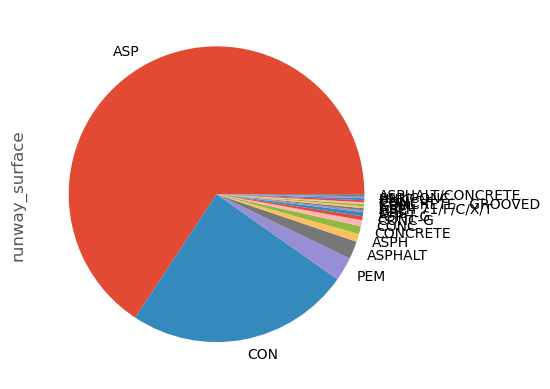

In [21]:
# large airports tend to be asphalt
df[df['type'] == 'large_airport']['runway_surface'].value_counts().plot(kind='pie')

In [22]:
df[df['type'] == 'seaplane_base']['runway_surface'].value_counts(normalize=True).to_frame().T

,WATER,WATER-E,WAT,WATER-G,TURF,DIRT,ASPH-TURF-G,ASPHALT/GRAVEL
runway_surface,0.860952,0.093333,0.030476,0.005714,0.00381,0.001905,0.001905,0.001905


<Axes: ylabel='runway_surface'>

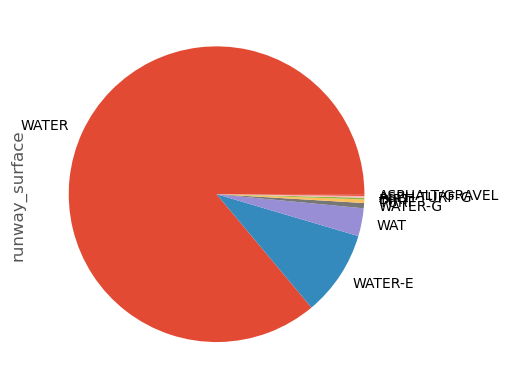

In [23]:
# not at all surprising that almost all seaplane bases have runways made of water 
df[df['type'] == 'seaplane_base']['runway_surface'].value_counts().plot(kind='pie')

In [24]:
df['runway_lighted'].value_counts(normalize=True).to_frame().T

,False,True
runway_lighted,0.882135,0.117865


<Axes: ylabel='runway_lighted'>

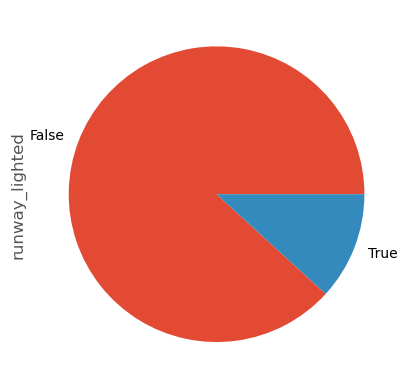

In [25]:
df['runway_lighted'].value_counts().plot(kind='pie')

In [26]:
df['runway_closed'].value_counts(normalize=True).to_frame().T

,False,True
runway_closed,0.995243,0.004757


<Axes: ylabel='runway_closed'>

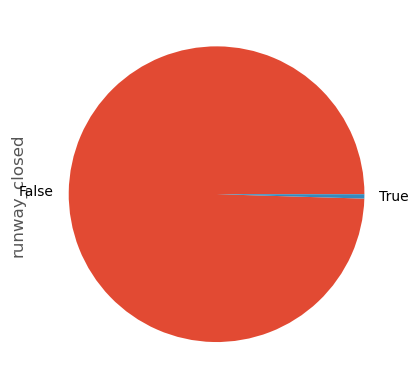

In [27]:
df['runway_closed'].value_counts().plot(kind='pie')